Shape of the NumPy array: (101, 101)
0


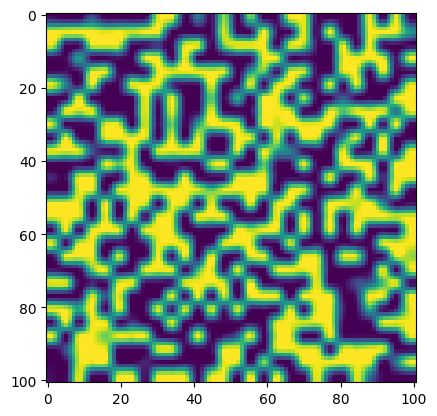

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# Load the JPEG image using PIL
image_path = '/content/blended_image_dot_pattern.png'
image = Image.open(image_path)
resized_image = image.resize((101, 101), Image.BICUBIC)
# Convert the image to a grayscale (L) image
gray_image =resized_image .convert('L')

# Convert the PIL Image to a NumPy array
image_array = np.array(gray_image)
uint16_array = np.zeros_like(image_array, dtype=np.uint16)
uint16_array[:, :] = image_array.astype(np.uint16)

# Display the shape of the NumPy array
print("Shape of the NumPy array:", image_array.shape)
plt.imshow(uint16_array)
print(uint16_array[100][100])

2073600
6577


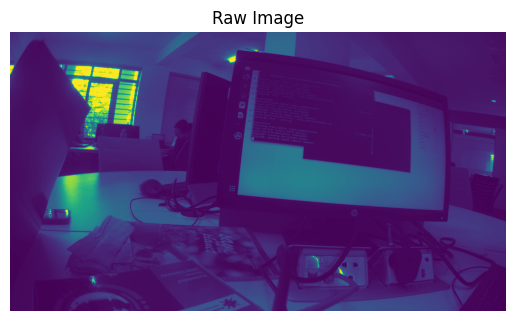

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
file_path = '/content/argus_bayerWithOutIsp.raw'
with open(file_path, 'rb') as file:
    raw_data = np.fromfile(file, dtype=np.uint16)
print(len(raw_data))
image_width = 1920
image_height = len(raw_data) // image_width
image_data = raw_data[:image_width * image_height].reshape((image_height, image_width))
print(image_data[100][100])
plt.imshow(image_data)
plt.title('Raw Image')
plt.axis('off')
plt.show()

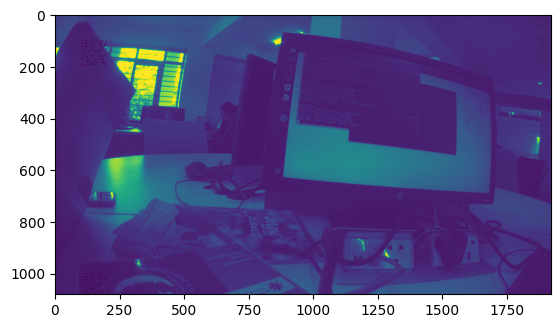

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create two images (NumPy arrays)
image1 =  image_data # Example blank image

image2 = uint16_array  # Example white square
#image2 = image2.astype(np.uint16)

# Specify the position to embed image2 into image1
row_index = 100
col_index = 100
# print("Before {} :\n", image1[row_index][col_index])

# Embed image2 into image1
for i in range(image2.shape[0]):
    for j in range(image2.shape[1]):
        if row_index + i < image1.shape[0] and col_index + j < image1.shape[1]:
            if image1[row_index + i][col_index + j] > image2[i][j] * 256:
                image1[row_index + i][col_index + j] = image2[i][j] * 256
            else:
                pass

# Display the result
plt.imshow(image1)  # Assuming grayscale images
plt.show()

Button(description='User Input', style=ButtonStyle())

Button(description='Blend Images (User Input)', style=ButtonStyle())

Dropdown(description='Pattern:', options=('Select Pattern', 'Pattern 1', 'Pattern 2', 'Pattern 3', 'Pattern 4'…

BoundedIntText(value=1000, description='Row Index:', max=1079)

BoundedIntText(value=100, description='Col Index:', max=1919)

BoundedIntText(value=28, description='Size:', max=1080, min=1)

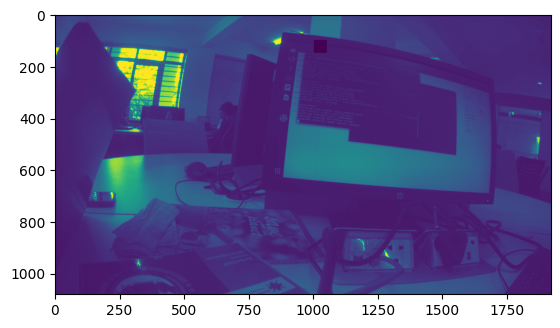

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import ipywidgets as widgets

# Load raw image data
file_path = '/content/argus_bayerWithOutIsp.raw'
with open(file_path, 'rb') as file:
    raw_data = np.fromfile(file, dtype=np.uint16)

image_width = 1920
image_height = len(raw_data) // image_width
image_data = raw_data[:image_width * image_height].reshape((image_height, image_width))

# Placeholder function for embedding images
def embed_images(image1, image2, row_index, col_index, size):
    for i in range(size):
        for j in range(size):
            if row_index + i < image1.shape[0] and col_index + j < image1.shape[1]:
                if image1[row_index + i][col_index + j] > image2[i][j] * 256:
                    image1[row_index + i][col_index + j] = image2[i][j] * 256

# Placeholder function for getting patterns based on user selection
def get_pattern(selected_pattern):
    # Define image paths based on the selected pattern
    pattern_paths = {
        'Select Pattern': '/content/blended_image_dot_pattern.png',
        'Pattern 1': '/content/blended_image_dot_pattern.png',
        'Pattern 2': '/content/generated_image (1).png',
        'Pattern 3': '/content/diffused_uniform_color_patch.png',
        'Pattern 4': '/content/qr.jpg'
    }
    # Load the selected pattern using PIL
    image_path = pattern_paths[selected_pattern]
    image = Image.open(image_path)
    resized_image = image.resize((10001, 10001), Image.BICUBIC)

    # Convert the image to grayscale (L)
    gray_image = resized_image.convert('L')

    # Convert PIL Image to NumPy array
    image_array = np.array(gray_image)
    uint16_array = np.zeros_like(image_array, dtype=np.uint16)
    uint16_array[:, :] = image_array.astype(np.uint16)

    return uint16_array

# Create dropdown for pattern selection
pattern_dropdown = widgets.Dropdown(
    options=['Select Pattern', 'Pattern 1', 'Pattern 2', 'Pattern 3', 'Pattern 4'],
    value='Select Pattern',
    description='Pattern:'
)

# Create textboxes for position coordinates
row_index_textbox = widgets.BoundedIntText(
    value=1000,
    min=0,
    max=image_data.shape[0] - 1,
    step=1,
    description='Row Index:'
)

col_index_textbox = widgets.BoundedIntText(
    value=100,
    min=0,
    max=image_data.shape[1] - 1,
    step=1,
    description='Col Index:'
)

# Create textbox for size
size_textbox = widgets.BoundedIntText(
    value=28,
    min=1,
    max=min(image_data.shape),
    step=1,
    description='Size:'
)

# Create button for user input
user_input_button = widgets.Button(description="User Input")

# Function to execute when user input button is clicked
def user_input_clicked(b):
    display(pattern_dropdown, row_index_textbox, col_index_textbox, size_textbox)

user_input_button.on_click(user_input_clicked)

# Create button for blend images based on user input
blend_user_input_button = widgets.Button(description="Blend Images (User Input)")

# Function to execute when blend user input button is clicked
def blend_user_input_clicked(b):
    # Get selected pattern from dropdown
    selected_pattern = pattern_dropdown.value

    # Embed image based on user input
    embed_images(image_data, get_pattern(selected_pattern), row_index_textbox.value, col_index_textbox.value, size_textbox.value)

    # Display the result
    plt.imshow(image_data)
    plt.show()

blend_user_input_button.on_click(blend_user_input_clicked)

# Display the buttons
display(user_input_button, blend_user_input_button)  # Display other buttons as well


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
dot_pattern_array = None  # Initialize as None

# Load raw image data
file_path = '/content/argus_bayerWithOutIsp.raw'
with open(file_path, 'rb') as file:
    raw_data = np.fromfile(file, dtype=np.uint16)

image_width = 1920
image_height = len(raw_data) // image_width
image_data = raw_data[:image_width * image_height].reshape((image_height, image_width))

def embed_images(image1, image2, row_index, col_index, size_height, size_width):
    for i in range(size_height):
        for j in range(size_width):
            if row_index + i < image1.shape[0] and col_index + j < image1.shape[1]:
                if image1[row_index + i][col_index + j] > image2[i][j] * 256:
                    image1[row_index + i][col_index + j] = image2[i][j] * 256

#  function for getting patterns based on user selection
def get_pattern(selected_pattern):
    global dot_pattern_array
    pattern_paths = {
        'Select Pattern': '/content/blended_image_dot_pattern.png',
        'Dot Pattern': '/content/blended_image_dot_pattern.png',
        'Noise Schedule': '/content/generated_image (1).png',
        'Color Patch': '/content/diffused_uniform_color_patch.png',
        'QR Code': '/content/qr.jpg'

    }

    # Load the selected pattern using PIL
    image_path = pattern_paths[selected_pattern]
    image = Image.open(image_path)
    resized_image = image.resize((101, 101), Image.BICUBIC)

    # Convert the image to grayscale (L)
    gray_image = resized_image.convert('L')

    # Convert PIL Image to NumPy array
    image_array = np.array(gray_image)
    uint16_array = np.zeros_like(image_array, dtype=np.uint16)
    uint16_array[:, :] = image_array.astype(np.uint16)
    dot_pattern_array = uint16_array

    return uint16_array

# dropdown for pattern selection
pattern_dropdown = widgets.Dropdown(
    options=['Select Pattern', 'Dot Pattern', 'Noise Schedule', 'Color Patch', 'QR Code'],
    value='Select Pattern',
    description='Pattern:'
)

#  textboxes for position coordinates
row_index_textbox = widgets.BoundedIntText(
    value=1000,
    min=0,
    max=image_data.shape[0] - 1,
    step=1,
    description='Row Index:'
)

col_index_textbox = widgets.BoundedIntText(
    value=100,
    min=0,
    max=image_data.shape[1] - 1,
    step=1,
    description='Col Index:'
)

# textbox for size
size_textbox = widgets.BoundedIntText(
    value=28,
    min=1,
    max=min(image_data.shape),
    step=1,
    description='Size:'
)

#  button for user input
user_input_button = widgets.Button(description="User Input")

# Function to execute when user input button is clicked
def user_input_clicked(b):
    display(pattern_dropdown, row_index_textbox, col_index_textbox, size_textbox)

user_input_button.on_click(user_input_clicked)

#  button for blend images based on user input
blend_user_input_button = widgets.Button(description="Embed Image (U)")

# Function to execute when blend user input button is clicked
def blend_user_input_clicked(b):
    # Get selected pattern from dropdown
    selected_pattern = pattern_dropdown.value

    # Embed image based on user input
    embed_images(image_data, get_pattern(selected_pattern), row_index_textbox.value, col_index_textbox.value, size_textbox.value, size_textbox.value)

    # Display the result
    plt.imshow(image_data)
    plt.show()
    # Save the modified image
    save_modified_image(image_data, '/content/modified_image.raw')

blend_user_input_button.on_click(blend_user_input_clicked)

# dropdown for local contrast selection
contrast_dropdown = widgets.Dropdown(
    options=['Select Pattern', 'Dot Pattern', 'Noise Schedule', 'Color Patch', 'QR Code'],
    value='Select Pattern',
    description='Local Contrast:'
)

#  button for local contrast input
local_contrast_button = widgets.Button(description="Local Contrast Input")

# Function to execute when local contrast button is clicked
def local_contrast_clicked(b):
    display(contrast_dropdown, size_textbox)

local_contrast_button.on_click(local_contrast_clicked)

#  button for blend images based on local contrast
blend_local_contrast_button = widgets.Button(description="Embed Image (L)")

# Define pattern paths
pattern_paths = {
    'Select Pattern': '/content/blended_image_dot_pattern.png',
    'Dot Pattern': '/content/blended_image_dot_pattern.png',
    'Noise Schedule': '/content/generated_image (1).png',
    'Color Patch': '/content/diffused_uniform_color_patch.png',
    'QR Code': '/content/qr.jpg'
}
def save_modified_image(image_data, file_path):
    flat_data = image_data.flatten()

    with open(file_path, 'wb') as file:
        flat_data.astype(np.uint16).tofile(file)

    print("Image saved successfully!")

# Function to find a block with similar contrast and embed the dot pattern
def embed_based_on_contrast(image_data, dot_pattern):
    if dot_pattern is None:
        print("Please select a pattern first.")
        return

    dot_data = dot_pattern
    dot_contrast = np.std(dot_data)

    block_height, block_width = dot_data.shape

    best_match = None
    best_contrast_diff = float('inf')

    for y in range(0, image_data.shape[0] - block_height, block_height):
        for x in range(0, image_data.shape[1] - block_width, block_width):
            block = image_data[y:y + block_height, x:x + block_width]
            block_contrast = np.std(block)
            contrast_diff = abs(block_contrast - dot_contrast)

            if contrast_diff < best_contrast_diff:
                best_match = (x, y)
                best_contrast_diff = contrast_diff

    if best_match:
        embed_images(image_data, dot_data, best_match[0], best_match[1], block_width, block_height)
        print(f"Pattern embedded at coordinates: {best_match}")
        plt.imshow(image_data)
        plt.title('Modified Image')
        plt.axis('off')
        plt.show()
    else:
        print("Unable to find a suitable block for embedding.")

# Function to execute when blend local contrast button is clicked
def blend_local_contrast_clicked(b):
    global image_data  # Make sure image_data is accessible

    # Get selected pattern from dropdown
    selected_pattern = contrast_dropdown.value

    # Process selected pattern using get_pattern
    pattern_data = get_pattern(selected_pattern)

    # Embed image based selected pattern
    embed_based_on_contrast(image_data, pattern_data)
    # Save the modified image
    save_modified_image(image_data, '/content/modified_image.raw')

blend_local_contrast_button.on_click(blend_local_contrast_clicked)

# Display buttons and widgets
display(user_input_button, blend_user_input_button, local_contrast_button, blend_local_contrast_button)


Button(description='User Input', style=ButtonStyle())

Button(description='Embed Image (U)', style=ButtonStyle())

Button(description='Local Contrast Input', style=ButtonStyle())

Button(description='Embed Image (L)', style=ButtonStyle())

In [ ]:
from skimage import io, metrics

# Load the images
image1 = io.imread('/content/o6.jpg')  # Replace 'path_to_image_1.jpg' with the path to your first image
image2 = io.imread('/content/r6.jpg')  # Replace 'path_to_image_2.jpg' with the path to your second image

# Compute the SSIM score
ssim_score = metrics.structural_similarity(image1, image2, multichannel=True)

print(f"The SSIM score between the images is: {ssim_score}")


<ipython-input-8-f62f51187953>:8: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(image1, image2, multichannel=True)


The SSIM score between the images is: 0.9990974608540717


Button(description='User Input', style=ButtonStyle())

Button(description='Embed Image (U)', style=ButtonStyle())

Button(description='Local Contrast Input', style=ButtonStyle())

Button(description='Embed Image (L)', style=ButtonStyle())

Button(description='Match Contrast', style=ButtonStyle())

Button(description='Match Intensity', style=ButtonStyle())

Dropdown(description='Select Pattern:', options=('Dot Pattern', 'Noise Schedule', 'Color Patch', 'QR Code'), v…

BoundedIntText(value=1000, description='Row Index:', max=1079)

BoundedIntText(value=100, description='Col Index:', max=1919)

BoundedIntText(value=28, description='Size:', max=1080, min=1)

Button(description='Confirm Match Intensity', style=ButtonStyle())

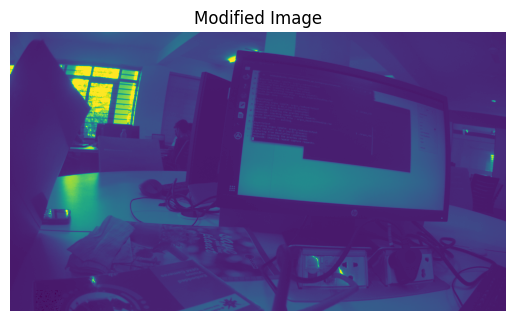

Image saved successfully!


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
dot_pattern_array = None  # Initialize as None

# Load raw image data
file_path = '/content/argus_bayerWithOutIsp.raw'
with open(file_path, 'rb') as file:
    raw_data = np.fromfile(file, dtype=np.uint16)

image_width = 1920
image_height = len(raw_data) // image_width
image_data = raw_data[:image_width * image_height].reshape((image_height, image_width))

def embed_images(image1, image2, row_index, col_index, size_height, size_width):
    for i in range(size_height):
        for j in range(size_width):
            if row_index + i < image1.shape[0] and col_index + j < image1.shape[1]:
                if image1[row_index + i][col_index + j] > image2[i][j] * 256:
                    image1[row_index + i][col_index + j] = image2[i][j] * 256

#  function for getting patterns based on user selection
def get_pattern(selected_pattern):
    global dot_pattern_array
    pattern_paths = {
        'Select Pattern': '/content/blended_image_dot_pattern.png',
        'Dot Pattern': '/content/blended_image_dot_pattern.png',
        'Noise Schedule': '/content/generated_image (1).png',
        'Color Patch': '/content/diffused_uniform_color_patch.png',
        'QR Code': '/content/qr.jpg'

    }

    # Load the selected pattern using PIL
    image_path = pattern_paths[selected_pattern]
    image = Image.open(image_path)
    resized_image = image.resize((101, 101), Image.BICUBIC)

    # Convert the image to grayscale (L)
    gray_image = resized_image.convert('L')

    # Convert PIL Image to NumPy array
    image_array = np.array(gray_image)
    uint16_array = np.zeros_like(image_array, dtype=np.uint16)
    uint16_array[:, :] = image_array.astype(np.uint16)
    dot_pattern_array = uint16_array

    return uint16_array

# dropdown for pattern selection
pattern_dropdown = widgets.Dropdown(
    options=['Select Pattern', 'Dot Pattern', 'Noise Schedule', 'Color Patch', 'QR Code'],
    value='Select Pattern',
    description='Pattern:'
)

#  textboxes for position coordinates
row_index_textbox = widgets.BoundedIntText(
    value=1000,
    min=0,
    max=image_data.shape[0] - 1,
    step=1,
    description='Row Index:'
)

col_index_textbox = widgets.BoundedIntText(
    value=100,
    min=0,
    max=image_data.shape[1] - 1,
    step=1,
    description='Col Index:'
)

# textbox for size
size_textbox = widgets.BoundedIntText(
    value=28,
    min=1,
    max=min(image_data.shape),
    step=1,
    description='Size:'
)

#  button for user input
user_input_button = widgets.Button(description="User Input")

# Function to execute when user input button is clicked
def user_input_clicked(b):
    display(pattern_dropdown, row_index_textbox, col_index_textbox, size_textbox)

user_input_button.on_click(user_input_clicked)

#  button for blend images based on user input
blend_user_input_button = widgets.Button(description="Embed Image (U)")

# Function to execute when blend user input button is clicked
def blend_user_input_clicked(b):
    # Get selected pattern from dropdown
    selected_pattern = pattern_dropdown.value

    # Embed image based on user input
    embed_images(image_data, get_pattern(selected_pattern), row_index_textbox.value, col_index_textbox.value, size_textbox.value, size_textbox.value)

    # Display the result
    plt.imshow(image_data)
    plt.show()
    # Save the modified image
    save_modified_image(image_data, '/content/modified_image.raw')

blend_user_input_button.on_click(blend_user_input_clicked)

# dropdown for local contrast selection
contrast_dropdown = widgets.Dropdown(
    options=['Select Pattern', 'Dot Pattern', 'Noise Schedule', 'Color Patch', 'QR Code'],
    value='Select Pattern',
    description='Local Contrast:'
)

#  button for local contrast input
local_contrast_button = widgets.Button(description="Local Contrast Input")

# Function to execute when local contrast button is clicked
def local_contrast_clicked(b):
    display(contrast_dropdown, size_textbox)

local_contrast_button.on_click(local_contrast_clicked)

#  button for blend images based on local contrast
blend_local_contrast_button = widgets.Button(description="Embed Image (L)")

# Define pattern paths
pattern_paths = {
    'Select Pattern': '/content/blended_image_dot_pattern.png',
    'Dot Pattern': '/content/blended_image_dot_pattern.png',
    'Noise Schedule': '/content/generated_image (1).png',
    'Color Patch': '/content/diffused_uniform_color_patch.png',
    'QR Code': '/content/qr.jpg'
}
def save_modified_image(image_data, file_path):
    flat_data = image_data.flatten()

    with open(file_path, 'wb') as file:
        flat_data.astype(np.uint16).tofile(file)

    print("Image saved successfully!")

# Function to find a block with similar contrast and embed the dot pattern
def embed_based_on_contrast(image_data, dot_pattern):
    if dot_pattern is None:
        print("Please select a pattern first.")
        return

    dot_data = dot_pattern
    dot_contrast = np.std(dot_data)

    block_height, block_width = dot_data.shape

    best_match = None
    best_contrast_diff = float('inf')

    for y in range(0, image_data.shape[0] - block_height, block_height):
        for x in range(0, image_data.shape[1] - block_width, block_width):
            block = image_data[y:y + block_height, x:x + block_width]
            block_contrast = np.std(block)
            contrast_diff = abs(block_contrast - dot_contrast)

            if contrast_diff < best_contrast_diff:
                best_match = (x, y)
                best_contrast_diff = contrast_diff

    if best_match:
        embed_images(image_data, dot_data, best_match[0], best_match[1], block_width, block_height)
        print(f"Pattern embedded at coordinates: {best_match}")
        plt.imshow(image_data)
        plt.title('Modified Image')
        plt.axis('off')
        plt.show()
    else:
        print("Unable to find a suitable block for embedding.")

# Function to execute when blend local contrast button is clicked
def blend_local_contrast_clicked(b):
    global image_data  # Make sure image_data is accessible

    # Get selected pattern from dropdown
    selected_pattern = contrast_dropdown.value

    # Process selected pattern using get_pattern
    pattern_data = get_pattern(selected_pattern)

    # Embed image based selected pattern
    embed_based_on_contrast(image_data, pattern_data)
    # Save the modified image
    save_modified_image(image_data, '/content/modified_image.raw')

blend_local_contrast_button.on_click(blend_local_contrast_clicked)

# Display buttons and widgets
display(user_input_button, blend_user_input_button, local_contrast_button, blend_local_contrast_button)
# Function to match contrast
def match_contrast(size, row, col):
    global dot_pattern_array

    if dot_pattern_array is None:
        print("Please select a pattern first.")
        return

    pattern_contrast = np.std(dot_pattern_array)
    block = image_data[row:row + size, col:col + size]
    block_contrast = np.std(block)

    # Adjust pattern contrast until it aligns within a threshold
    while abs(block_contrast - pattern_contrast) > 5:  # Modify the threshold as needed
        if block_contrast > pattern_contrast:
            dot_pattern_array = (dot_pattern_array.astype(np.float64) * 1.1).astype(np.uint16)  # Increase pattern contrast
        else:
            dot_pattern_array = (dot_pattern_array.astype(np.float64) * 0.9).astype(np.uint16)  # Decrease pattern contrast
        pattern_contrast = np.std(dot_pattern_array)

    # Embed pattern with adjusted contrast
    embed_images(image_data, dot_pattern_array, row, col, size, size)
    plt.imshow(image_data)
    plt.title('Modified Image')
    plt.axis('off')
    plt.show()
    save_modified_image(image_data, '/content/modified_image.raw')

# Button for matching contrast
match_contrast_button = widgets.Button(description="Match Contrast")

# Function to execute when match contrast button is clicked
def match_contrast_clicked(b):
    global dot_pattern_array

    # Dropdown for pattern selection
    pattern_dropdown = widgets.Dropdown(
        options=['Dot Pattern', 'Noise Schedule', 'Color Patch', 'QR Code'],
        value='Dot Pattern',
        description='Select Pattern:'
    )

    # Textboxes for position coordinates and size
    row_index_textbox = widgets.BoundedIntText(
        value=1000,
        min=0,
        max=image_data.shape[0] - 1,
        step=1,
        description='Row Index:'
    )

    col_index_textbox = widgets.BoundedIntText(
        value=100,
        min=0,
        max=image_data.shape[1] - 1,
        step=1,
        description='Col Index:'
    )

    size_textbox = widgets.BoundedIntText(
        value=28,
        min=1,
        max=min(image_data.shape),
        step=1,
        description='Size:'
    )

    # Function to execute when confirm match button is clicked
    def confirm_match_clicked(conf):
        selected_pattern = pattern_dropdown.value
        dot_pattern_array = get_pattern(selected_pattern)
        match_contrast(size_textbox.value, row_index_textbox.value, col_index_textbox.value)

    confirm_match_button = widgets.Button(description="Confirm Match")
    confirm_match_button.on_click(confirm_match_clicked)

    display(pattern_dropdown, row_index_textbox, col_index_textbox, size_textbox, confirm_match_button)

match_contrast_button.on_click(match_contrast_clicked)

# Display the match contrast button
display(match_contrast_button)


def match_intensity(row, col, size):
    global dot_pattern_array

    if dot_pattern_array is None:
        print("Please select a pattern first.")
        return

    block = image_data[row:row + size, col:col + size]
    pattern_mean = np.mean(dot_pattern_array)
    block_mean = np.mean(block)

    intensity_difference = block_mean - pattern_mean
    normalized_pattern = dot_pattern_array.astype(np.float64) / np.max(dot_pattern_array)  # Normalize pattern

    adjusted_pattern = (normalized_pattern * intensity_difference) + normalized_pattern  # Adjust intensity

    # Clip values to maintain uint16 range
    adjusted_pattern = np.clip(adjusted_pattern * np.iinfo(np.uint16).max, 0, np.iinfo(np.uint16).max).astype(np.uint16)

    # Embed pattern with adjusted intensity
    embed_images(image_data, adjusted_pattern, row, col, size, size)
    plt.imshow(image_data)
    plt.title('Modified Image')
    plt.axis('off')
    plt.show()
    save_modified_image(image_data, '/content/modified_image.raw')

# Button for matching intensity
match_intensity_button = widgets.Button(description="Match Intensity")

# Function to execute when match intensity button is clicked
def match_intensity_clicked(b):
    global dot_pattern_array

    # Dropdown for pattern selection
    pattern_dropdown = widgets.Dropdown(
        options=['Dot Pattern', 'Noise Schedule', 'Color Patch', 'QR Code'],
        value='Dot Pattern',
        description='Select Pattern:'
    )

    # Textboxes for position coordinates and size
    row_index_textbox = widgets.BoundedIntText(
        value=1000,
        min=0,
        max=image_data.shape[0] - 1,
        step=1,
        description='Row Index:'
    )

    col_index_textbox = widgets.BoundedIntText(
        value=100,
        min=0,
        max=image_data.shape[1] - 1,
        step=1,
        description='Col Index:'
    )

    size_textbox = widgets.BoundedIntText(
        value=28,
        min=1,
        max=min(image_data.shape),
        step=1,
        description='Size:'
    )

    # Function to execute when confirm match intensity button is clicked
    def confirm_intensity_match_clicked(conf):
        selected_pattern = pattern_dropdown.value
        dot_pattern_array = get_pattern(selected_pattern)
        match_intensity(row_index_textbox.value, col_index_textbox.value, size_textbox.value)

    confirm_intensity_button = widgets.Button(description="Confirm Match Intensity")
    confirm_intensity_button.on_click(confirm_intensity_match_clicked)

    display(pattern_dropdown, row_index_textbox, col_index_textbox, size_textbox, confirm_intensity_button)

match_intensity_button.on_click(match_intensity_clicked)

# Display the match intensity button
display(match_intensity_button)

<ipython-input-9-0e8878a01aaf>:58: RuntimeWarning: overflow encountered in ulong_scalars
  mean_intensity_diff = np.sum(modified_block) - np.sum(input_block)


Dissimilar Blocks based on Local Histogram Comparison (Chi-Square Dissimilarity):
[]
Dissimilar Blocks based on Local Contrast:
[(64, 64), (96, 64), (64, 96), (96, 96)]
Dissimilar Blocks based on Mean Luminance:
[]
Dissimilar Blocks based on Mean Intensity:
[(64, 64), (96, 64), (64, 96), (96, 96)]
Dissimilar Blocks based on Standard Deviation:
[(64, 64), (96, 64), (64, 96), (96, 96)]


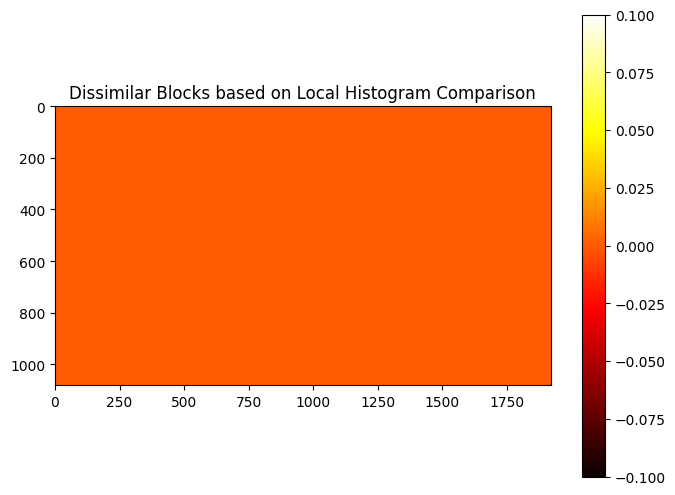

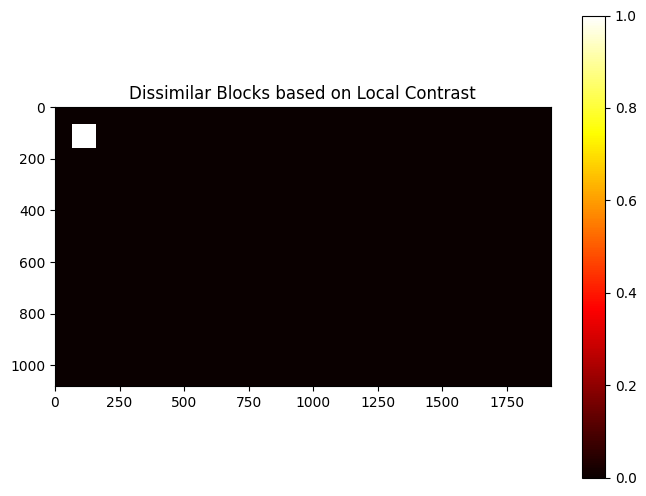

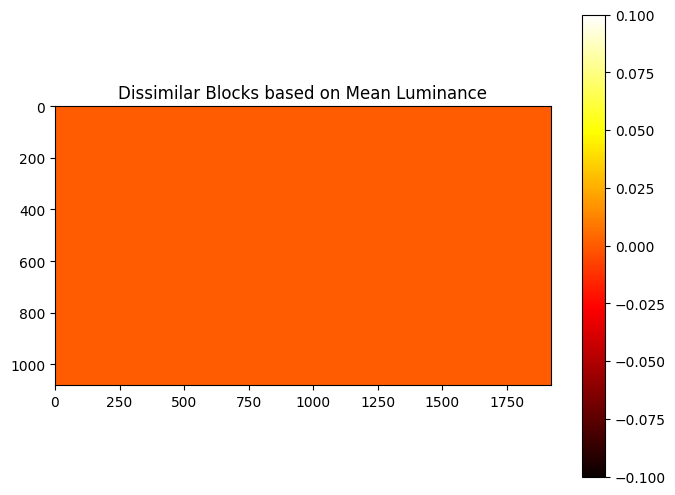

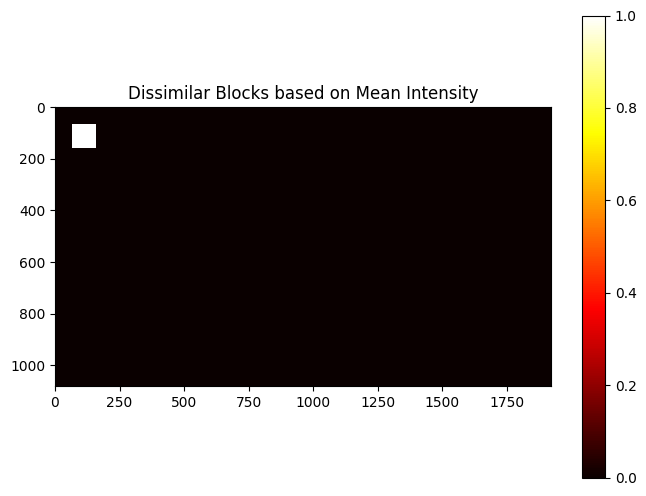

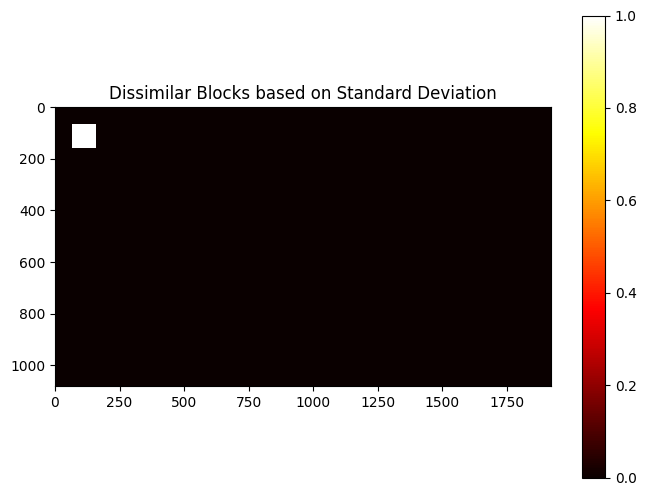

In [ ]:
from PIL import Image
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Load the modified raw image and input image
modified_raw_image_path = '/content/modified_image.raw'


# Load the modified raw image
with open(modified_raw_image_path, 'rb') as file:
    modified_raw_data = np.fromfile(file, dtype=np.uint16)

modified_image_width = 1920
modified_image_height = len(modified_raw_data) // modified_image_width
modified_raw_image = modified_raw_data[:modified_image_width * modified_image_height].reshape((modified_image_height, modified_image_width))

input_raw_image_path = '/content/argus_bayerWithOutIsp.raw'
with open(input_raw_image_path, 'rb') as file:
    input_raw_data = np.fromfile(file, dtype=np.uint16)

input_image_width = 1920
input_image_height = len(input_raw_data) // input_image_width
input_image_array = input_raw_data[:input_image_width * input_image_height].reshape((input_image_height, input_image_width))
# Parameters for block-based comparison
block_size = 64
step_size = 32

# Function to calculate chi-square dissimilarity for blocks
def calculate_block_dissimilarity(input_block, modified_block):
    input_hist, _ = np.histogram(input_block, bins=256, range=(0, 65535))
    modified_hist, _ = np.histogram(modified_block, bins=256, range=(0, 65535))

    chi_squared = np.sum((input_hist - modified_hist) ** 2 / (input_hist + modified_hist + 1e-10))
    return chi_squared

# lists to store dissimilar blocks
dissimilar_blocks_histogram = []
dissimilar_blocks_contrast = []
dissimilar_blocks_mean_luminance = []
dissimilar_blocks_mean_intensity = []
dissimilar_blocks_std_dev = []

# Compare images based on blocks
for y in range(0, min(input_image_array.shape[0], modified_raw_image.shape[0]) - block_size, step_size):
    for x in range(0, min(input_image_array.shape[1], modified_raw_image.shape[1]) - block_size, step_size):
        input_block = input_image_array[y:y + block_size, x:x + block_size]
        modified_block = modified_raw_image[y:y + block_size, x:x + block_size]

        # Compare histograms using chi-square dissimilarity
        chi_squared = calculate_block_dissimilarity(input_block, modified_block)
        if chi_squared > chi2.ppf(0.025, 255):  # Adjust threshold as needed
            dissimilar_blocks_histogram.append((x, y))

        # Calculate local contrast, mean luminance, mean intensity, and standard deviation
        contrast_diff = np.std(modified_block) - np.std(input_block)
        mean_luminance_diff = np.mean(modified_block) - np.mean(input_block)
        mean_intensity_diff = np.sum(modified_block) - np.sum(input_block)
        std_dev_diff = np.std(modified_block) - np.std(input_block)

        # Store dissimilar blocks based on various comparisons
        if contrast_diff > 0:
            dissimilar_blocks_contrast.append((x, y))
        if mean_luminance_diff > 0:
            dissimilar_blocks_mean_luminance.append((x, y))
        if mean_intensity_diff > 0:
            dissimilar_blocks_mean_intensity.append((x, y))
        if std_dev_diff > 0:
            dissimilar_blocks_std_dev.append((x, y))

# Display dissimilar blocks for each comparison
print("Dissimilar Blocks based on Local Histogram Comparison (Chi-Square Dissimilarity):")
print(dissimilar_blocks_histogram)

print("Dissimilar Blocks based on Local Contrast:")
print(dissimilar_blocks_contrast)

print("Dissimilar Blocks based on Mean Luminance:")
print(dissimilar_blocks_mean_luminance)

print("Dissimilar Blocks based on Mean Intensity:")
print(dissimilar_blocks_mean_intensity)

print("Dissimilar Blocks based on Standard Deviation:")
print(dissimilar_blocks_std_dev)


# Function to create a heatmap for dissimilar blocks
def plot_heatmap(dissimilar_blocks, title):
    #empty matrix representing the image shape
    heatmap = np.zeros((image_height, image_width))

    # Mark dissimilar blocks with value 1
    for block in dissimilar_blocks:
        x, y = block
        heatmap[y:y + block_size, x:x + block_size] = 1


    plt.figure(figsize=(8, 6))
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Display heatmaps for each comparison
plot_heatmap(dissimilar_blocks_histogram, 'Dissimilar Blocks based on Local Histogram Comparison')
plot_heatmap(dissimilar_blocks_contrast, 'Dissimilar Blocks based on Local Contrast')
plot_heatmap(dissimilar_blocks_mean_luminance, 'Dissimilar Blocks based on Mean Luminance')
plot_heatmap(dissimilar_blocks_mean_intensity, 'Dissimilar Blocks based on Mean Intensity')
plot_heatmap(dissimilar_blocks_std_dev, 'Dissimilar Blocks based on Standard Deviation')


In [ ]:
# Load the original raw data
original_file_path = '/content/argus_bayerWithOutIsp.raw'
with open(original_file_path, 'rb') as file:
    original_raw_data = np.fromfile(file, dtype=np.uint16)

# Load the modified raw data
modified_file_path = '/content/modified_image.raw'
with open(modified_file_path, 'rb') as file:
    modified_raw_data = np.fromfile(file, dtype=np.uint16)

# Display information about the data
print("Original Raw Data:")
print("Shape:", original_raw_data.shape)
print("Data Type:", original_raw_data.dtype)
print("Minimum Value:", np.min(original_raw_data))
print("Maximum Value:", np.max(original_raw_data))

print("\nModified Raw Data:")
print("Shape:", modified_raw_data.shape)
print("Data Type:", modified_raw_data.dtype)
print("Minimum Value:", np.min(modified_raw_data))
print("Maximum Value:", np.max(modified_raw_data))


Original Raw Data:
Shape: (2073600,)
Data Type: uint16
Minimum Value: 3952
Maximum Value: 65535

Modified Raw Data:
Shape: (2073600,)
Data Type: uint16
Minimum Value: 0
Maximum Value: 65535
